In [1]:
#Kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
#Büyük ölcekli örnekler için veri seti
def load_application_train():
  data = pd.read_csv("application_train.csv")
  return data

data = load_application_train()
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Küçük ölçekli örnekler için veri seti
def load():
  data = pd.read_csv("titanic.csv")
  return data

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


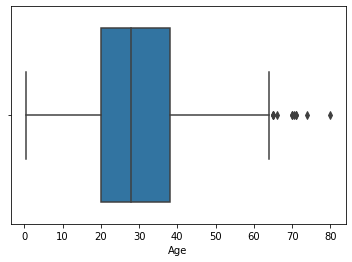

In [4]:
#Aykırı degerler
sns.boxplot(x=df["Age"]) #Kutu grafik bir değişkenin dağılım bilgisini verir. Histogram grafik çeşidi de kullanılabilir.
plt.show()

In [5]:
#Aykırı değerleri yakalamak
#Bir değişkenin çeyrek değerlerini hesaplayarak başlanır.
q1 = df["Age"].quantile(0.25) # Age değişkeninin %25lik çeyreği hesaplıyoruz.
q1

20.125

In [6]:
q3 =df["Age"].quantile(0.75) #3. çeyrek değeri
q3

38.0

In [7]:
# iqr hesabını yapıyoruz.
iqr = q3 - q1
iqr

17.875

In [8]:
#Üst satır için:
up = q3 + 1.5 *iqr
#Alt sınır için:
low = q1 - 1.5 * iqr

In [9]:
up

64.8125

In [10]:
low

-6.6875

In [11]:
#Alt sınırdan küçük veya üst sınıftan büyük olanları getireceğiz. Zaten yaş - li değer alamayacağından çıkan - li sonucu görmezden gelecek.
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [12]:
#Sonucun indexlerini alıyoruz. Yani bunlar aykırı değerler.
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [13]:
# Hızlı bir biçimde aykırı değer olup olmadığını sorgulamak istersek :
df[(df["Age"] < low) | (df["Age"] > up)].any(axis = None)

True

In [14]:
#Aykırı olmayanları sorgulamak istersek önüne ~ koyarız.
df[~((df["Age"] < low) | (df["Age"] > up))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
#Aykırı değer var mı diye kontrol ettik. İçerisi boş olduğunda False dönecek.
df[(df["Age"] < low)].any(axis=None)

False

## **Fonksiyonlaştırma**

In [16]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
  quantile1 = dataframe[col_name].quantile(q1)
  quantile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quantile3 - quantile1
  up_limit = quantile3 + 1.5 * interquantile_range
  low_limit = quantile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [17]:
low, up = outlier_thresholds(df, "Age")

In [18]:
#Teker teker low up hesaplaması yapmamıza gerek kalmadı.
df[(df["Age"] < low) | (df["Age"] > up)]. head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [19]:
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [20]:
#Kod akışı esnasında aykırı değer olup olmamasına göre işlem yapmayı tercih edeceksek bu fonksiyonun bool değer döndürmesi gerekir.
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [21]:
#Age, fire gibi sütunlar sayısal olduğundan hesaplamaları kolayca yaptık. Ancak diğer türler için ne uygulayabiliriz?
check_outlier(df, "Age")

True

In [22]:
#grab_col_names
#categorik, cardinal, sayisal değişkenleri ayıklamayı hedefliyoruz.
data = load_application_train()
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Değişkenleri yakalayabilmek için :
def grab_col_names(dataframe, cat_th=10, car_th=20): #essiz deger sayisi 10dan kucukse kategorik degisken, 20 den buyukse de kardinal degisken gibi dusunucez. 
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int","float"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
  cat_cols = num_but_cat + cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int","float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"Categorical Columns: {len(cat_cols)}")
  print(f"Numerical Columns: {len(num_cols)}")
  print(f"Categoric but Cardinal: {len(cat_but_car)}")
  print(f"Numeric but Categoric: {len(num_but_cat)}") #Burası sadece raporlamak için verilmiştir.

  return cat_cols, num_cols, cat_but_car

In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
Categorical Columns: 6
Numerical Columns: 3
Categoric but Cardinal: 3
Numeric but Categoric: 4


In [25]:
cat_cols

['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']

In [26]:
#Buradaki passenger id tipinden ötürü buraya geldi. Date gibi değişkenler olsaydı onlar da buraya dahil olacaktı. 
#Fakat bunlar fonksiyonun okunulabilirliğini düşeceğinden dolayı bu değişkenleri dışarıda bırakmayı tercih ederiz.
num_cols

['PassengerId', 'Age', 'Fare']

In [27]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [28]:
#Fonksiyonun okunulabilirliğini düşeceğinden dolayı PassengerId dışarıda bırakmayı tercih ettik.
num_cols
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [29]:
num_cols

['Age', 'Fare']

In [30]:
#numerik değişkenlerde outlier var mı diye kontrol ettik.
for col in num_cols:
  print(col, check_outlier(df,col))

Age True
Fare True


In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
Categorical Columns: 6
Numerical Columns: 3
Categoric but Cardinal: 3
Numeric but Categoric: 4


In [32]:
cat_cols, num_cols, cat_but_car

(['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked'],
 ['PassengerId', 'Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [33]:
data = load_application_train()

In [34]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 15523
Variables: 122
Categorical Columns: 57
Numerical Columns: 64
Categoric but Cardinal: 1
Numeric but Categoric: 42


In [35]:
#application_train datamızdaki outlier kontrolünü sağlıyoruz.
for col in num_cols:
  print(col, check_outlier(data, col))

SK_ID_CURR False
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI T

In [36]:
#En baştaki SK_ID_CURR  bir exceptiondur. Ayırmak gerekir.
num_cols
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [37]:
#Böylelikle bütün sayısalları ayıklamış olduk.
num_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONA

# **Aykırı Değerlere Erişmek**

In [38]:
#Tekrar tekrar hesaplama yapmamak adına (Don't Repeat Yourself !)
def grab_outliers(dataframe, col_name, index=False):
  low, up = outlier_thresholds(dataframe, col_name)
  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

In [39]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


In [40]:
#Bu index bilgilerini tekrar kullanabilmek adına atama yapılabilir.
age_index = grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


## **Aykırı Değer Problemi Çözme**

In [41]:
#Aykırı değerleri bulabilmek için low ve up değerlerine ihtiyacımız var.
low, up = outlier_thresholds(df,"Fare")
low, up

(-26.724, 65.6344)

In [42]:
#Aykırı olmayanları getiriyoruz.
df[~((df["Fare"] < low) | (df["Fare"] > up))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

(775, 12)

In [44]:
#Outlier değişkenleri silmek istiyorsak bunun için de bir fonksiyon tanımlayabiliriz.
def remove_outliers(dataframe, col_name, index=False):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
  return df_without_outliers

In [45]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]


Observations: 891
Variables: 12
Categorical Columns: 6
Numerical Columns: 3
Categoric but Cardinal: 3
Numeric but Categoric: 4


In [46]:
df.shape

(891, 12)

In [48]:
#Kalıcı bir değişiklik olmaması adına, bu yenilikleri başka bir değişkene atıyorum.
for col in num_cols:
  new_df = remove_outliers(df, col)

In [49]:
df.shape[0]

891

In [50]:
#Ayıklanmış dataframe
new_df.shape[0]

775

In [51]:
#116 değişken silinmiş
df.shape[0] - new_df.shape[0]

116

## **Baskılama Yöntemi**

In [52]:
# Veri kaybını önlemek amacıyla, eşik değerlerinin üstünde kalan değerler eşit değerleriyle değiştirilir.
low, up = outlier_thresholds(df, "Fare")
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"] #Fare değişkeninin aykırı değerleri

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [53]:
#Burada da loc kullanaral belirli değerden küçük ya da büyük olan değerleri getirmesini istedik.
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [54]:
# loc kullanarak büyük olan aykırı değerleri up'a eşitledik. up limitleri aykırı değerlerin yeni değerleri olarak değiştirdik. 
# Aykırıların yerine up limitleri basmış oluruz.
# Örneğin üst limitim 100dü. 100 üzerindeki değerleri bulup onlara da 100 yaptık. Böylece baskılamış olduk.
df.loc[(df["Fare"] > up), "Fare"] = up

In [ ]:
# low limitlerimizi bu dataframe için değiştiremeyiz. Çünkü alt sınırdan küçük bir değişken yok.
# Aynısını low için de yapmamız gerekirse diye yine de yazalım.
df.loc[(df["Fare"] < low), "Fare"] = low

In [55]:
#Bu işlem için de bir fonksiyon tanımlayalım.
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [56]:
#Bütün işlemleri train dataframei için baştan yapalım.
df = load()

In [57]:
df.shape

(891, 12)

In [58]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]


Observations: 891
Variables: 12
Categorical Columns: 6
Numerical Columns: 3
Categoric but Cardinal: 3
Numeric but Categoric: 4


In [59]:
for col in num_cols:
  print(col, check_outlier(df, col))

Age True
Fare True


In [60]:
#Aykırı değişkenlerin üstte ve altta kalan değerlerini üst ve alt limitle değiştirelim.
for col in num_cols:
  replace_with_thresholds(df, col)

In [61]:
#Aykırı değerleri değiştirdikten sonra tekrar kontol edelim.
for col in num_cols:
  print(col, check_outlier(df, col))

Age False
Fare False


In [ ]:
# Özet geçmek gerekirse :
df = load() #train dataframeini df değişkenimize atadık.
outlier_thresholds(df, "Age") #Öncelikle aykırı değerimizi saptama işlemi yaptık.
check_outlier(df, "Age") #Bu thresholdlara göre outlier var mı yok mu diye kontrol ettik.
grab_outliers(df,"Age", index = True) #Var olan outlierları getirmesini istedik.

#Veriyi tedavi etme süreci:
remove_outliers(df,"Age").shape #Aykırı değerleri silme işlemi gerçekleştirdik. Ama atama yapmadık. Orjinal veri hala elimizde.
replace_with_thresholds(df, "Age") #Burada baskılama yöntemi uygulayarak, aykırı değerleri low ve uplarla değiştirdik. Atama yapmamıza gerek yok çünkü fonksiyonun içerisinde kullandığımız loc yapısından dolayı kalıcı değişiklik yapıyor olacak.
check_outlier(df,"Age") # Outlier verileri tekrardan var mı yok mu diye kontrol ettik, zaten uyguladığımız işlemler sonucunda false dönmesi gerekiyor. True dönerse bir yer gözden kaçırılmış demektir. Kontrolleri sağlamalıyız.
